# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Loading Dataset

In [2]:
# Using pandas 'read_csv' function to read the csv file
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Exploring Dataset:

In [3]:
df.info() # using info function to print details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# The above information shows that the dataset has 768 entries (rows) and 8 columns
# Dataset has numeric columns only

# Null Values:

In [5]:
df.isnull().sum() # Using is nul

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# The above information shows that the dataset has not a null values.

# Exploring Duplicates:

In [7]:
# Using duplicated function to explore the duplicate entries and
#it is showing that the dataset has not any duplicate entries
df.duplicated().sum()

0

# Exploring Statistical Information:

In [8]:
df.describe().T # Using describe function to understand statistics of dataset

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
numerical_df = df.select_dtypes(include=['int', 'float']) # Extracting numerical columns for label encoding
numerical_columns = numerical_df.columns

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Calculate mean, median, standard deviation, skewness, and kurtosis for each numeric column
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.apply(skew),
    'Kurtosis': numerical_df.apply(kurtosis)
}

# Convert statistics to a DataFrame for plotting
statistics_df = pd.DataFrame(statistics)
statistics_df

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Pregnancies,3.845052,3.0000,3.369578,0.899912,0.150383
Glucose,120.894531,117.0000,31.972618,0.173414,0.628813
BloodPressure,69.105469,72.0000,19.355807,-1.840005,5.138691
SkinThickness,20.536458,23.0000,15.952218,0.109159,-0.524494
Insulin,79.799479,30.5000,115.244002,2.267810,7.159575
BMI,31.992578,32.0000,7.884160,-0.428143,3.261257
DiabetesPedigreeFunction,0.471876,0.3725,0.331329,1.916159,5.550792
Age,33.240885,29.0000,11.760232,1.127389,0.631177
Outcome,0.348958,0.0000,0.476951,0.633776,-1.598328


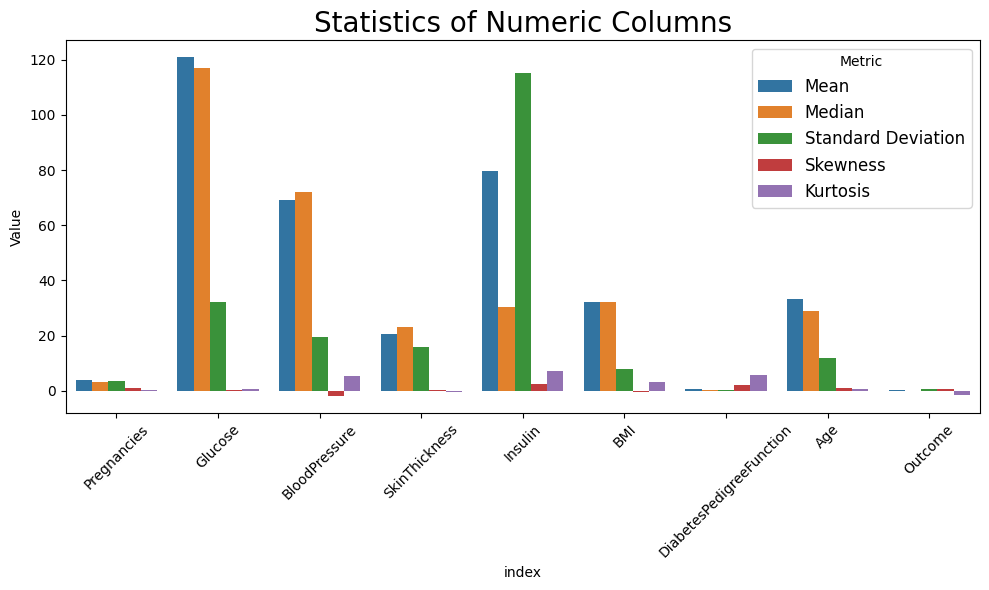

In [11]:
# Reset index to turn the index into a column
statistics_df.reset_index(inplace=True)

# Melt the DataFrame
melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the statistics
plt.figure(figsize=(10, 6))

sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
plt.title('Statistics of Numeric Columns', fontsize = 20)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization:

In [12]:
# scatter plot
def scatter_plot(x_axis, y_axis, dataframe, title):
  '''Function for scatter plot, takes x, y and dataset'''
  plt.figure(figsize = (6, 4))
  sns.scatterplot(x = x_axis, y = y_axis, data = dataframe)
  plt.title(title, fontsize=16)
  plt.xlabel(x_axis, fontsize=16)
  plt.ylabel(y_axis, fontsize=16)
  plt.xticks()
  plt.grid(True)
  plt.show()

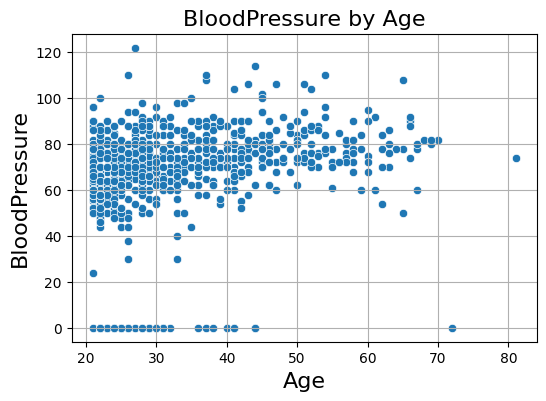

In [13]:
scatter_plot('Age', 'BloodPressure', df, "BloodPressure by Age")

In [14]:
# hist plot
def hist_plot(x_axis, dataframe, title):
  '''Function for developing histogram plot, takes x,  and dataset'''
  plt.figure(figsize = (6, 4))
  sns.histplot(x = x_axis,  data = dataframe)
  plt.title(title, fontsize=18)
  plt.xlabel(x_axis, fontsize=16)
  plt.xticks()
  plt.grid(True)
  plt.show()

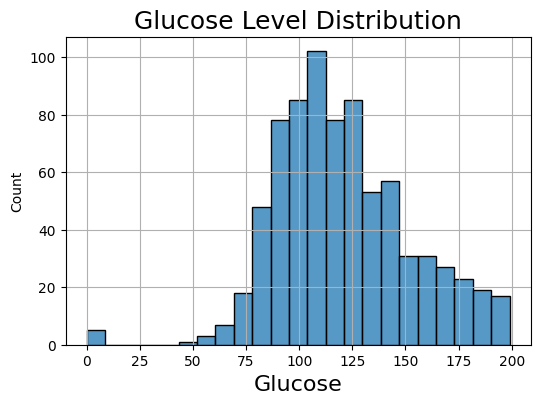

In [15]:
hist_plot('Glucose', df, 'Glucose Level Distribution')

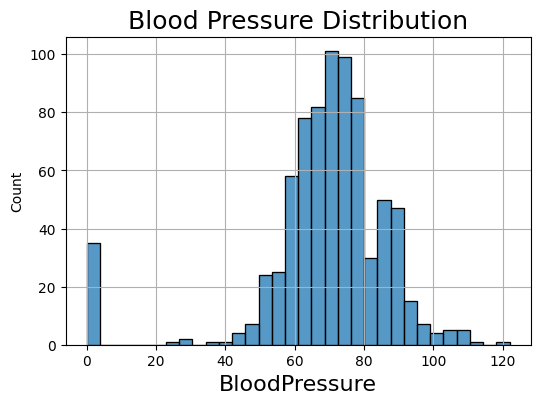

In [33]:
hist_plot('BloodPressure', df, 'Blood Pressure Distribution')

In [16]:
# count_plot
def count_plot(y, title, font_size=12 ):
  ''' function take x and y axis values and will plot a count plot'''
  sns.countplot(y=y,data=df)
  plt.title(title, fontsize=20)
  plt.xlabel('Count', fontsize=18)
  plt.ylabel('Diabetes', fontsize=18)
  plt.grid(True)
  plt.show()
  plt.savefig('countplot.png')

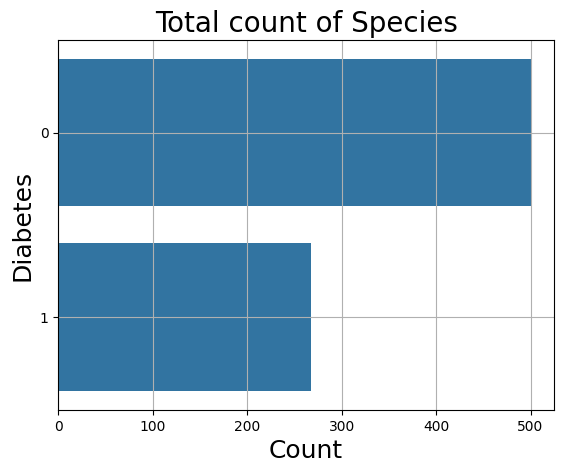

<Figure size 640x480 with 0 Axes>

In [17]:
count_plot(df['Outcome'], 'Total count of Species')

In [18]:
def corr_plot(dataframe):
  ''' Function that takes dataframe and will return a heatmap plot'''
  correlation_matrix = dataframe.corr()
  # Plotting heatmap for viualising correlation
  plt.figure(figsize=(8, 7))
  sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.09)
  plt.title('Correlation Heatmap', fontsize=25)
  plt.show()
  plt.savefig('correlation heatmap')


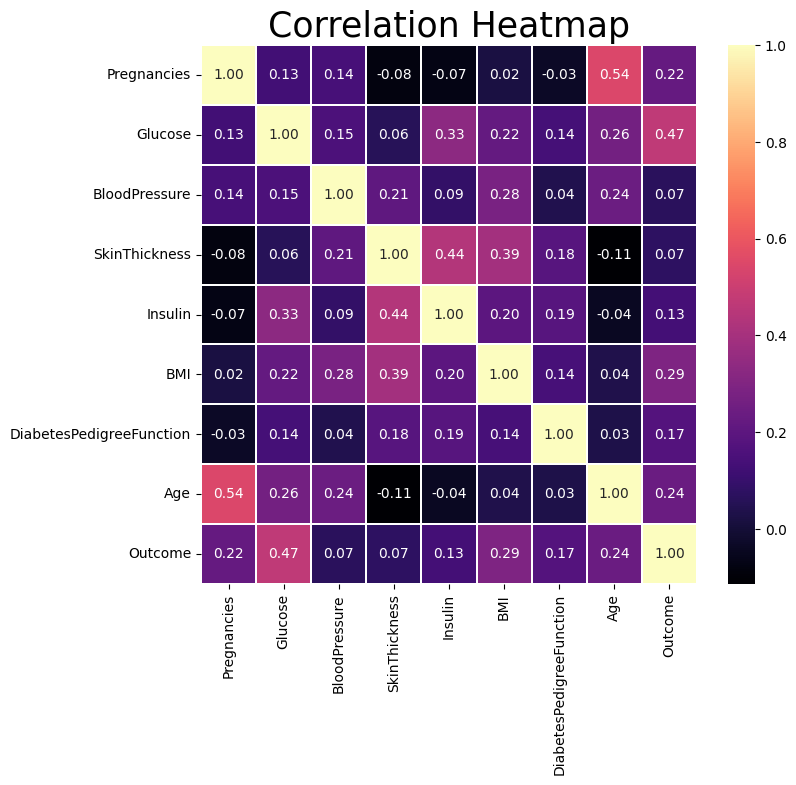

<Figure size 640x480 with 0 Axes>

In [19]:
corr_plot(df)

In [20]:
features = df.drop('Outcome', axis=1)

# Scaling:

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

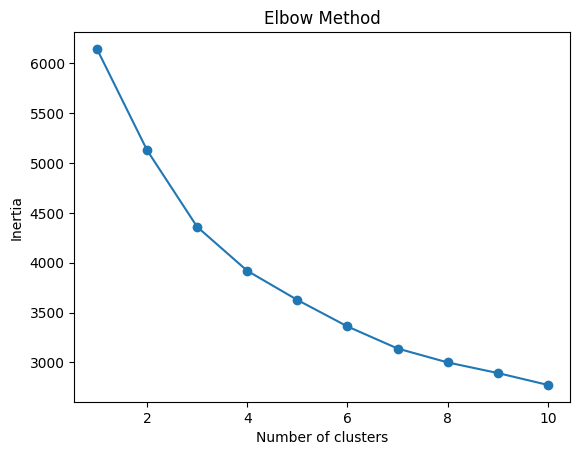

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values for different number of clusters
inertia_values = []

# Loop through different values of k
for k in range(1, 11):
    # Initialize KMeans with current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)  # Using df_scaled is  scaled data

    # Append the inertia value (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)
def elbow_method():
  # Plotting the Elbow Method graph
  plt.plot(range(1, 11), inertia_values, marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()
elbow_method()

In [23]:
def cluster_plot(k):
    ''' Function that take K (clusters) value and will plot a graph of clusters'''
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=500, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(df_scaled)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans, cmap='coolwarm')
    plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
    plt.title('K-means clustering (k={})'.format(k))
    plt.legend()
    plt.show()

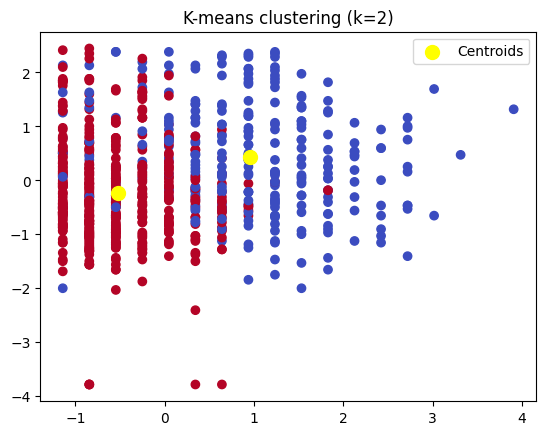

In [24]:
cluster_plot(2)

# Linear Regression with sklearn:

# Line Fitting:

# Predicting Skin Thickness by Insulin Level:

In [25]:
X_feature = df[['Insulin']]
y_feature = df[['SkinThickness']]

In [26]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

 #Independent variable
XY = pd.DataFrame(x)
# Dependent variable
Z = y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XY, Z, test_size=0.2, random_state=42)
# Perform multiple linear regression
mlr = LinearRegression()
# Fit the model
mlr.fit(X_train, y_train)

# Predict on test data
y_pred = mlr.predict(X_test)

print(mlr.coef_)

# Get the coefficients
β1 = mlr.coef_[0][0]
# Get the intercept
α = mlr.intercept_

print(α)

[[0.41974011]]
[-0.01459316]


In [28]:
from scipy import stats as st
# Re-format the results of the linear regression
params = np.append(mlr.coef_, mlr.intercept_)
# Use the model to predict other output values
predictions = mlr.predict(X_test)
# Sum of squared residuals
sum_sq_residuals = sum((y_test - predictions)**2)
# Degrees of freedom (sample size - number of parameters)
dof = len(y_train) - len(params)
# Mean squared error
mse = sum_sq_residuals / dof
# Add a constant
X_train['Constant'] = 1
# Covariances of the parameters ('@'' is the dot product)
cov = mse * np.diagonal(np.linalg.inv(X_train.T @ X_train))
# Standard errors of the parameters
se = np.sqrt(cov)
# t-statistics associated with the parameters
t_statistics = params / se
# Two-tailed test
tails = 2
# Calculate the p-values
p_values = [tails * (1 - st.t.cdf(np.abs(t), dof)) for t in t_statistics]
# Significance level
alpha = 0.05
# Percent-point function (aka quantile function) of the t-distribution
t = st.t.ppf(1 - (alpha / tails), dof)
# Margin of error
d = t * se
# 95% confidence interval
upper_ci = params + d
lower_ci = params - d

In [29]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Display the results
output = [params, se, t_statistics, np.array(p_values), lower_ci, upper_ci]
index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output = pd.DataFrame(output, index=index, columns=list(X_train)).round(3)
output = output.T
print(output)

          Value  Standard Error  t-Statistic  p-Value  Lower CI  Upper CI
0         0.420            0.02       20.688    0.000     0.380     0.460
Constant -0.015            0.02       -0.713    0.476    -0.055     0.026


# Confidence Interval Plot Using Seaborn library:

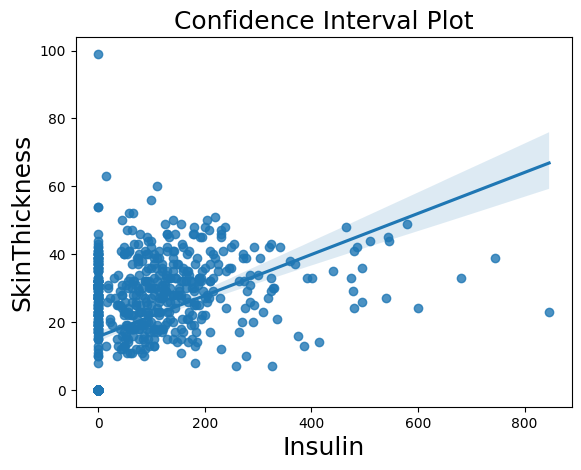

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot regplot using seaborn
sns.regplot(x='Insulin', y='SkinThickness', data=df)
plt.title('Confidence Interval Plot', fontsize=18)
plt.xlabel('Insulin', fontsize=18)
plt.ylabel('SkinThickness', fontsize=18)
plt.show()

R-squared: 0.19


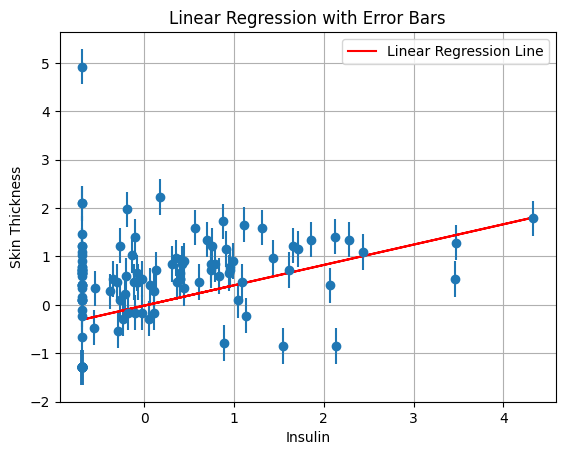

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confidence interval
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mse = np.mean(squared_errors)
std_dev = np.std(squared_errors)
margin_of_error = 1.96 * (std_dev / np.sqrt(len(y_pred)))
confidence_interval = (mse - margin_of_error, mse + margin_of_error)
# Generate random indices to select 20 values
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)
# Plot data points with error bars

plt.errorbar(X_test.flatten(), y_test.flatten(), yerr=margin_of_error, fmt='o', )

# Plot linear regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')

# # Calculate and display R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

plt.xlabel('Insulin')
plt.ylabel('Skin Thickness')
plt.title('Linear Regression with Error Bars')
plt.legend()
plt.grid(True)
plt.show()
